In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("ENTEROBACTER - blida.xlsx")
cf = df.iloc[:,6:18]
df.drop(columns=cf.columns, inplace=True)
df.drop(columns=["ATB", "Remarques:", "Unnamed: 19"], inplace=True)


In [4]:
df["souche"].drop_duplicates()

0           Escherichia coli
2            Enterobacter sp
3          Proteus mirabilis
9      Klebsiella pneumoniae
103         Proteus vulgaris
126     Citrobacter freundii
184              Proteus spp
185             Serratia spp
186           Klebsiella spp
297       Proteuse mirabilis
374       Klebsiella ozaenae
383    Serratia liquefaciens
464         EScherichia coli
537                      NaN
Name: souche, dtype: object

In [3]:
df["date"] = df["date"].astype("str")
for i in range(len(df)):
    df.iloc[i,4] = df.iloc[i,4][:7]
df.head()

,souche,SEXE,age,désignation,date
0,Escherichia coli,F,35,E.C.B.U,2023-01
1,Escherichia coli,F,86,E.C.B.U,2023-01
2,Enterobacter sp,F,86,E.C.B.U,2023-01
3,Proteus mirabilis,M,1,E.C.B.U,2023-01
4,Escherichia coli,F,29,E.C.B.U,2023-01


In [4]:
p.iloc[i,0]

NameError: name 'p' is not defined

In [5]:
p = pd.DataFrame(index=range(len(df)), columns=['Resistant', 'Sensitive', 'Intermediate'])
p['Resistant'] = [["/"] for _ in range(len(df))]
p['Sensitive'] = [["/"] for _ in range(len(df))]
p['Intermediate'] = [["/"] for _ in range(len(df))]

for i in range(len(cf)):
    for j in range(len(cf.columns)):
        if cf.iloc[i,j] == "R":
            if len(p.iloc[i,0]) == 1 and p.iloc[i,0][0] == "/":
                p.iloc[i,0] = [cf.columns[j]]
            else:
                p.iloc[i,0].append(cf.columns[j])
        elif cf.iloc[i,j] == "S":
            if len(p.iloc[i,1]) == 1 and p.iloc[i,1][0] == "/":
                p.iloc[i,1] = [cf.columns[j]]
            else:
                p.iloc[i,1].append(cf.columns[j])
        elif cf.iloc[i,j] == "I":
            if len(p.iloc[i,2]) == 1 and p.iloc[i,2][0] == "/" :
                p.iloc[i,2] = [cf.columns[j]]
            else:
                p.iloc[i,2].append(cf.columns[j])

p.head()

,Resistant,Sensitive,Intermediate
0,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
1,"[AMPICILLINE (AMP), FOSFOMYCINE (FOS), TRIMETH...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), CIPROFLO..."
2,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[GENTAMICINE (GM), AMIKACINE (AK), CIPROFLOXAC...",[IMIPENEME (IPM)]
3,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
4,[AMPICILLINE (AMP)],"[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), TRIMETHO..."


In [6]:
df["Resistant"] = p["Resistant"]
df["Sensitive"] = p["Sensitive"]
df["Intermediate"] = p["Intermediate"]
df.dropna(inplace=True)
df.head()

,souche,SEXE,age,désignation,date,Resistant,Sensitive,Intermediate
0,Escherichia coli,F,35,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
1,Escherichia coli,F,86,E.C.B.U,2023-01,"[AMPICILLINE (AMP), FOSFOMYCINE (FOS), TRIMETH...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), CIPROFLO..."
2,Enterobacter sp,F,86,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[GENTAMICINE (GM), AMIKACINE (AK), CIPROFLOXAC...",[IMIPENEME (IPM)]
3,Proteus mirabilis,M,1,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
4,Escherichia coli,F,29,E.C.B.U,2023-01,[AMPICILLINE (AMP)],"[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), TRIMETHO..."


In [7]:
# out = df.to_json(orient='records')[1:-1].replace('},{', '} {')
# with open('database.json', 'w') as f:
#     f.write(out)

df.to_json('database.json', orient='records', lines=True)

In [8]:
df.head()

,souche,SEXE,age,désignation,date,Resistant,Sensitive,Intermediate
0,Escherichia coli,F,35,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
1,Escherichia coli,F,86,E.C.B.U,2023-01,"[AMPICILLINE (AMP), FOSFOMYCINE (FOS), TRIMETH...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), CIPROFLO..."
2,Enterobacter sp,F,86,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[GENTAMICINE (GM), AMIKACINE (AK), CIPROFLOXAC...",[IMIPENEME (IPM)]
3,Proteus mirabilis,M,1,E.C.B.U,2023-01,"[AMPICILLINE (AMP), AMOXYCILLINE+ AC CLAVULANI...","[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...",[/]
4,Escherichia coli,F,29,E.C.B.U,2023-01,[AMPICILLINE (AMP)],"[CEFAZOLINE (CZ), CEFOXITINE, CEFOTAXIME (CTX)...","[AMOXYCILLINE+ AC CLAVULANIQUE (AMC), TRIMETHO..."


# Preprocessing

In [10]:
for i in range(len(df)):
    if(df.iloc[i,0] == "EScherichia coli"):
        df.iloc[i,0] = "Escherichia coli"

# Analytics

# Antibiotics

In [34]:
df = pd.read_excel("ENTEROBACTER - blida.xlsx")

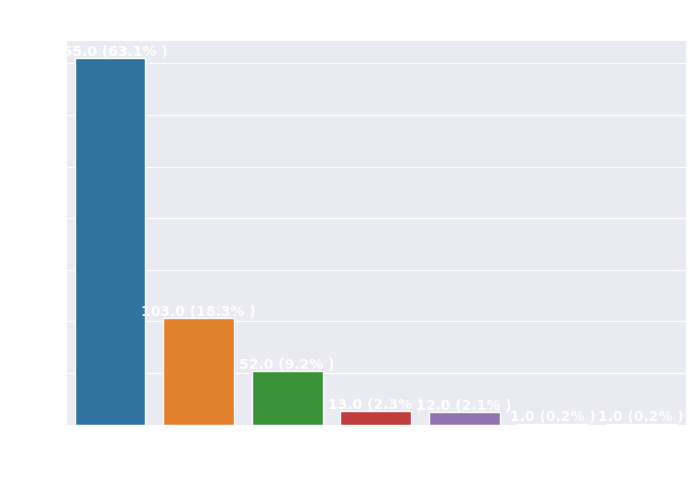

In [40]:
def Single_Barplot_resistance(bact, resistant, title):
    sns.set_style('darkgrid')
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
    sns.barplot(ax=ax1, x=bact[resistant].value_counts().index, y=bact[resistant].value_counts())
    ax1.set_title(title)
    
    ax1.set(xlabel='Behavior (Comportement)', ylabel='Density')

    total_count = len(bact[resistant])  # Get the total count for calculating percentages

    for i in ax1.containers:
        ax1.bar_label(i, labels=[f'{h.get_height()} ({h.get_height()/total_count*100:.1f}% )' for h in i], 
                      label_type='edge', color='white', fontsize=10, weight='bold')
        

    # Set X and Y axis labels color to white
    plt.gca().xaxis.label.set_color('white')
    plt.gca().yaxis.label.set_color('white')

    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')
    plt.title(title, fontsize=20, color='white')

    # Save the figure as a transparent PNG
    plt.savefig('figure2.png', transparent=True)

    return ax1

        
ax = Single_Barplot_resistance(df, "AMPICILLINE (AMP)", "AMPICILLINE Resistance")       

# Bacteria

In [12]:
Ecoli = df[df["souche"] == "Escherichia coli"]
Ecoli["AMPICILLINE (AMP)"].value_counts()

R      249
/       66
S       45
I       10
R/R     10
R/I      1
S/R      1
Name: AMPICILLINE (AMP), dtype: int64

In [13]:
len(Ecoli)

382

In [14]:
Resistants = [x for x in list(df.columns) if '(' in x]

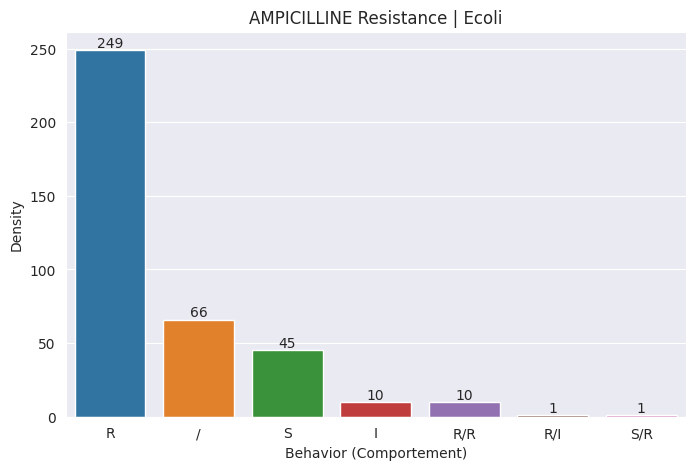

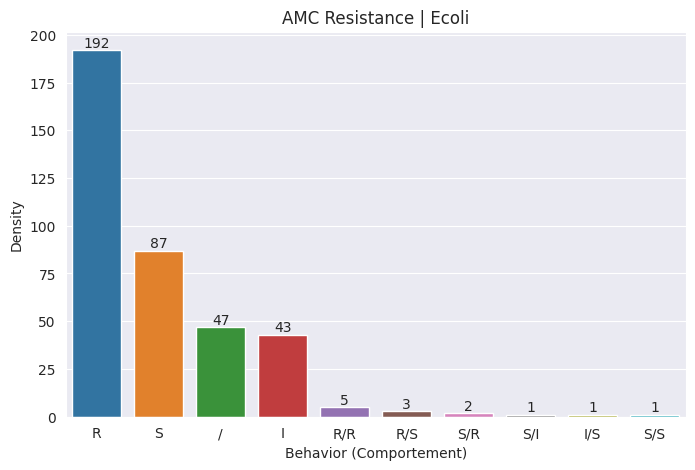

In [15]:
def Single_Barplot_resistance(bact, resistant, title):
    sns.set_style('darkgrid')
    fig, ax1 = plt.subplots(1,1, figsize=(8, 5))
    sns.barplot(ax=ax1, x= bact[resistant].value_counts().index ,y= bact[resistant].value_counts())
    ax1.set_title(title)
    ax1.set(xlabel='Behavior (Comportement)', ylabel='Density')
    for i in ax1.containers:
        ax1.bar_label(i,)
    return ax1
        
ax = Single_Barplot_resistance(Ecoli, "AMPICILLINE (AMP)", "AMPICILLINE Resistance | Ecoli")       
ax1 = Single_Barplot_resistance(Ecoli, "AMOXYCILLINE+ AC CLAVULANIQUE (AMC)", "AMC Resistance | Ecoli")  

In [16]:
Ecoli = df[df["souche"] == "Escherichia coli"]
Enterobacter_sp = df[df["souche"] == "Enterobacter sp"]
Proteus_mirabilis = df[df["souche"] == "Proteus mirabilis"]
Klebsiella_pneumoniae = df[df["souche"] == "Klebsiella pneumoniae"]
Citrobacter_freundii = df[df["souche"] == "Citrobacter freundii"]
Proteus_spp = df[df["souche"] == "Proteus spp"]
Serratia_spp = df[df["souche"] == "Serratia spp"]
Klebsiella_spp = df[df["souche"] == "Klebsiella spp"]
Proteuse_mirabilis = df[df["souche"] == "Proteuse mirabilis"]
Klebsiella_ozaenae = df[df["souche"] == "Klebsiella ozaenae"]
Serratia_liquefaciens = df[df["souche"] == "Serratia liquefaciens"]

In [33]:
df = pd.read_excel("ENTEROBACTER - blida.xlsx")
df.columns

Index(['souche', 'SEXE', 'age', 'désignation', 'date', 'ATB',
       'AMPICILLINE (AMP)', 'AMOXYCILLINE+ AC CLAVULANIQUE (AMC)',
       'CEFAZOLINE (CZ)', 'CEFOXITINE', 'CEFOTAXIME (CTX)', 'IMIPENEME (IPM)',
       'GENTAMICINE (GM)', 'AMIKACINE (AK)', 'CIPROFLOXACINE (CIP)',
       'FURANES (', 'FOSFOMYCINE (FOS)',
       'TRIMETHOPRIME/SULFAMETHOXAZOLE (COT)', 'Remarques:', 'Unnamed: 19'],
      dtype='object')

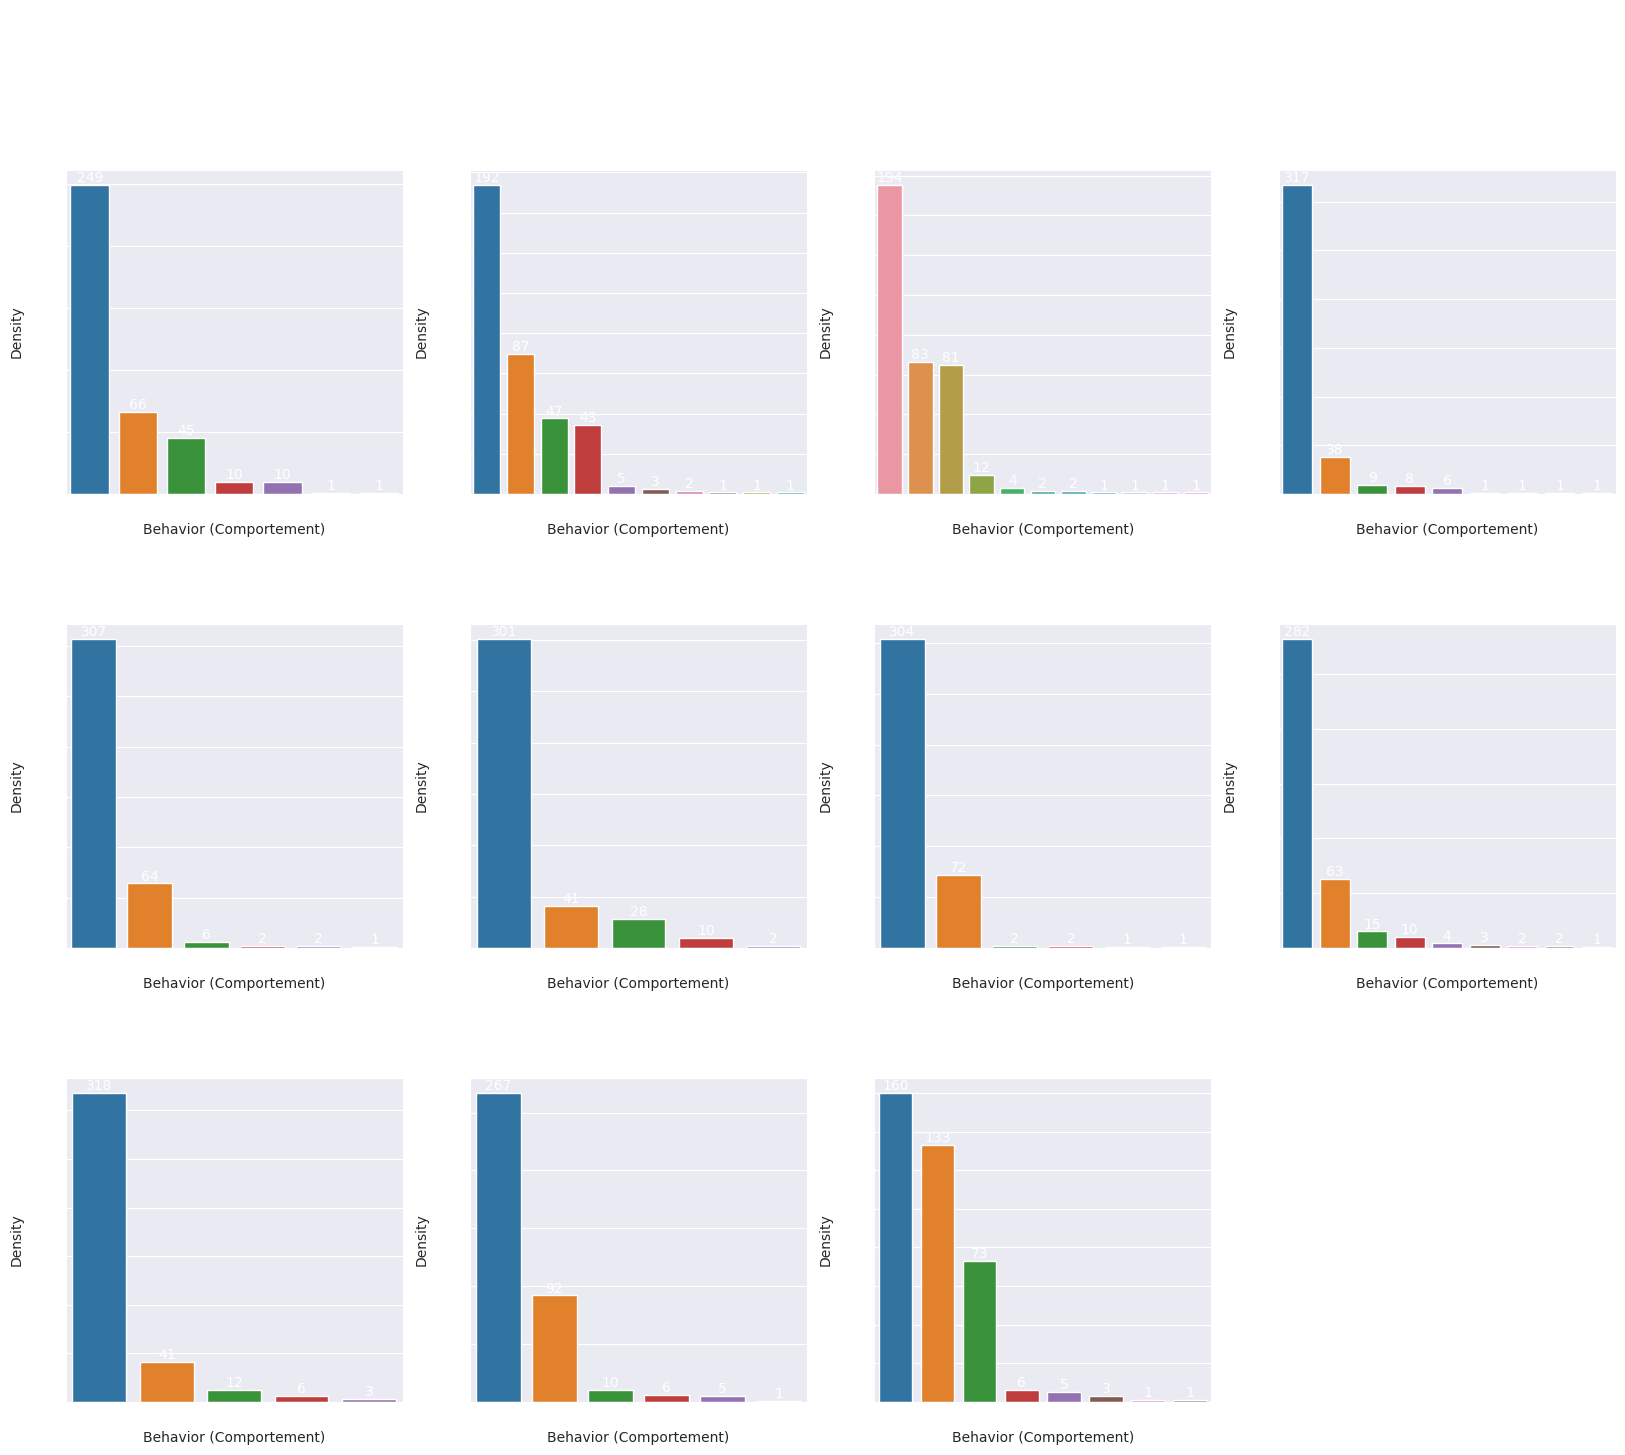

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def bacteria_resistance_plot(Bacteria, bacteria_name, Resistants=Resistants):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
    fig.suptitle(bacteria_name + ' Resistance', fontsize=18)

    fig.subplots_adjust(hspace=0.4)

    axes[-1, -1].remove()
    axes = axes.flatten()

    for ax, resistant in zip(axes.flatten(), Resistants):
        sns.barplot(ax=ax, x=Bacteria[resistant].value_counts().index, y=Bacteria[resistant].value_counts())
        ax.set_title(resistant, color='white')  # Set title text color to white
        ax.set(xlabel='Behavior (Comportement)', ylabel='Density')
        ax.set_xticklabels(Bacteria[resistant].value_counts().index, rotation=0)

        for i in ax.containers:
            ax.bar_label(i, color='white')  # Set the color of barplot text to white

        # Set the color of x-axis labels to white
        for label in ax.get_xticklabels():
            label.set_color('white')

        # Set the color of y-axis labels to white
        for label in ax.get_yticklabels():
            label.set_color('white')

    # Set the color of the suptitle text to white
    fig.suptitle(bacteria_name + ' Resistance', fontsize=18, color='white')

    plt.savefig("Barplots_statistics/" + bacteria_name + ".png", transparent=True)

bacteria_resistance_plot(Ecoli, "Escherichia coli")

# bacteria_resistance_plot(Enterobacter_sp, "Enterobacter_sp")
# bacteria_resistance_plot(Proteus_mirabilis, "Proteus_mirabilis")
# bacteria_resistance_plot(Klebsiella_pneumoniae, "Klebsiella_pneumoniae")
# bacteria_resistance_plot(Citrobacter_freundii, "Citrobacter_freundii")
# bacteria_resistance_plot(Proteus_spp, "Proteus_spp")
# bacteria_resistance_plot(Serratia_spp, "Serratia_spp")
# bacteria_resistance_plot(Klebsiella_spp, "Klebsiella_spp")
# bacteria_resistance_plot(Proteuse_mirabilis, "Proteuse_mirabilis")
# bacteria_resistance_plot(Klebsiella_ozaenae, "Klebsiella_ozaenae")
# bacteria_resistance_plot(Serratia_liquefaciens, "Serratia_liquefaciens")

<Axes: xlabel='date', ylabel='AMPICILLINE (AMP)'>

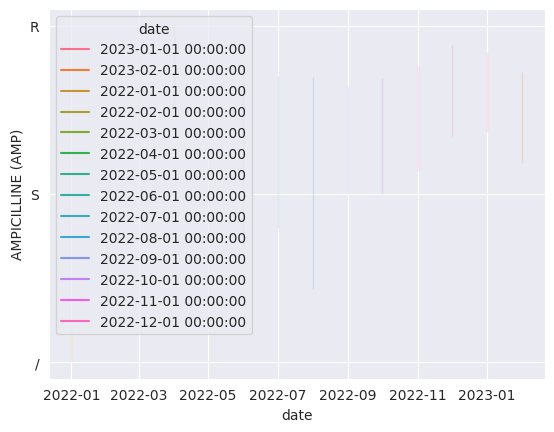

In [259]:
Ecoli[Ecoli["date"] == "2023-01"]

resistant = Resistants[0]

R_df = df[df[resistant] == "R"]
sns.lineplot(x=Ecoli["date"], y=Ecoli[resistant], hue=Ecoli["date"])


Ecoli.groupby("date")

# sns.lineplot(x=Ecoli["date"], y=Ecoli[Resistants[0]].value_counts())

In [281]:
Ecoli.groupby("date")['AMPICILLINE (AMP)'].value_counts().reset_index(name='count')

,date,AMPICILLINE (AMP),count
0,2022-01-01,/,24
1,2022-01-01,R,1
2,2022-02-01,/,19
3,2022-02-01,R,10
4,2022-03-01,R,20
5,2022-03-01,/,3
6,2022-03-01,S,2
7,2022-03-01,I,1
8,2022-04-01,R,23
9,2022-04-01,/,1


In [23]:
pivot = Ecoli.pivot_table(index='date', columns='AMPICILLINE (AMP)', aggfunc='size', fill_value=0)
pivot = pivot.reset_index()
pivot.head()

AMPICILLINE (AMP),date,/,I,R,R/I,R/R,S,S/R
0,2022-01-01,24,0,1,0,0,0,0
1,2022-02-01,19,0,10,0,0,0,0
2,2022-03-01,3,1,20,0,0,2,0
3,2022-04-01,1,1,23,0,0,0,0
4,2022-05-01,0,0,22,0,0,0,0


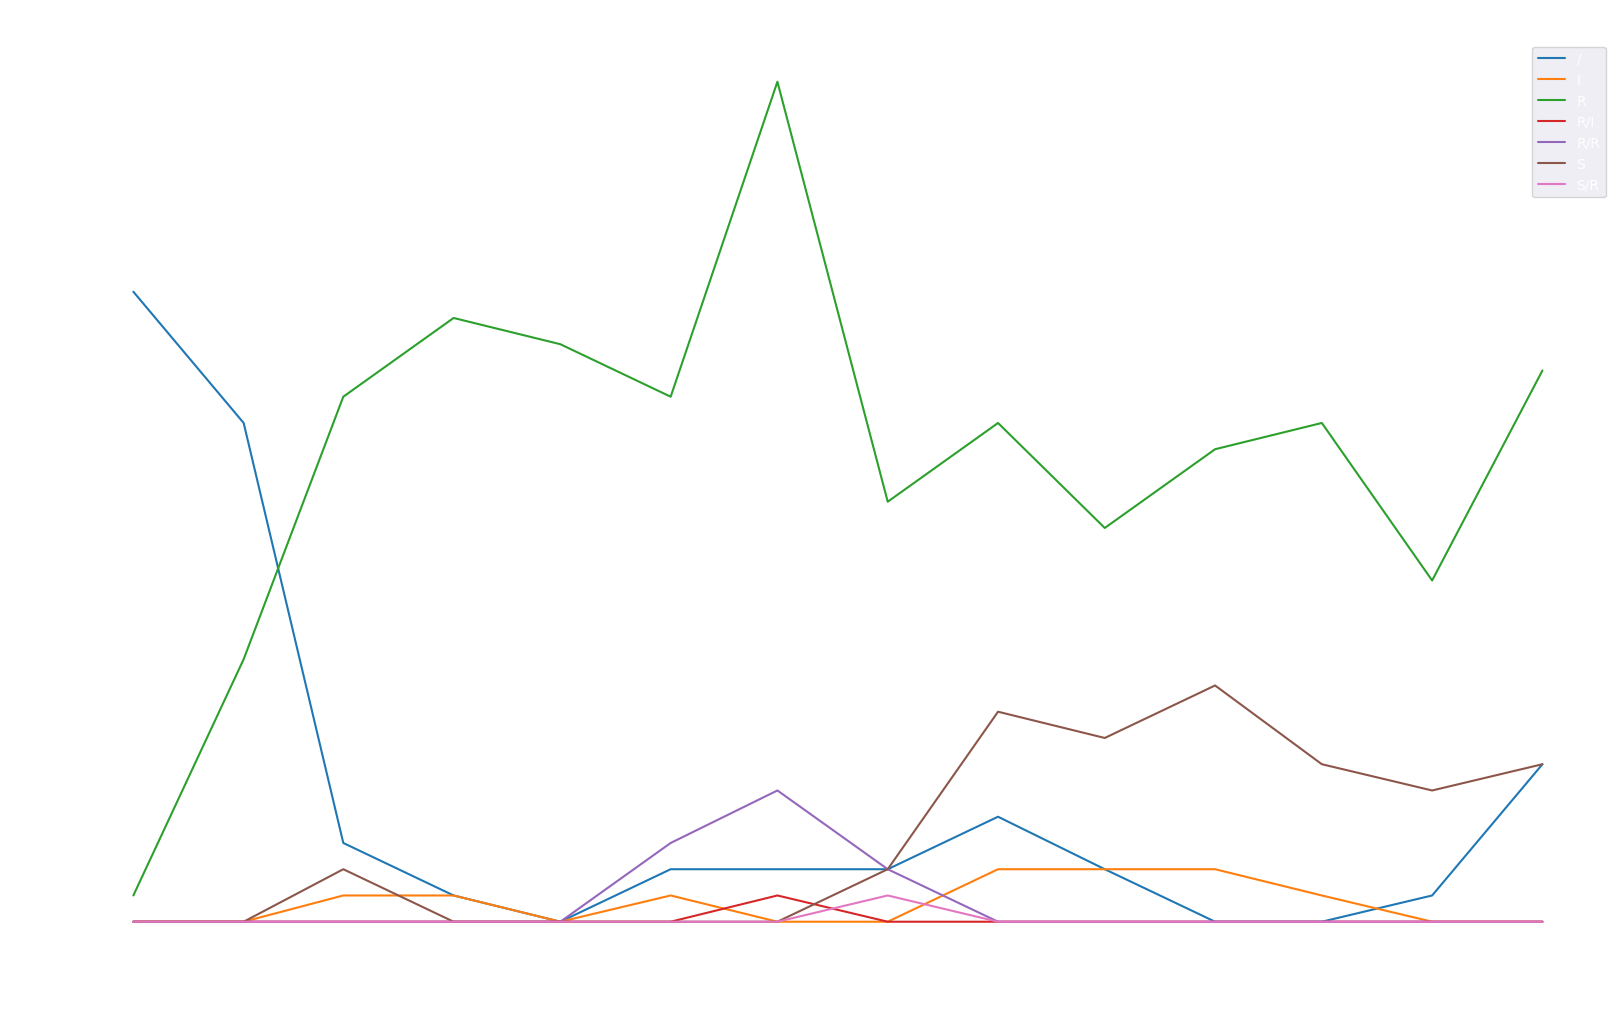

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pivot = Ecoli.pivot_table(index='date', columns='AMPICILLINE (AMP)', aggfunc='size', fill_value=0)
pivot = pivot.reset_index()

plt.figure(figsize=(20, 12))

for column in pivot.columns[1:]:
    sns.lineplot(x='date', y=column, data=pivot, label=column)

plt.title('Escherichia coli - Resistance Tracking', fontsize=20, color='white')
plt.legend(fontsize=15)
plt.xlabel('Date', fontsize=15, color='white')
plt.ylabel('Occurrences', fontsize=15, color='white')

# Set background to transparent
plt.gca().patch.set_alpha(0)

# Set all text color to white
for text in plt.gca().get_children():
    if isinstance(text, plt.Text):
        if text.get_text() not in ['date', '0', '1']:
            text.set_color('white')

# Set legend text color to white
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('white')

# Set X and Y axis labels color to white
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')

plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Save the figure as a transparent PNG
plt.savefig('figure.png', transparent=True)
